# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [1]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

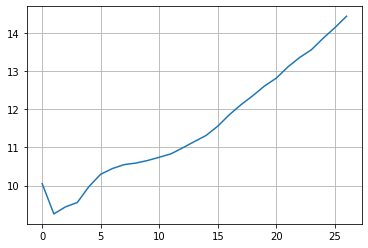

In [7]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

m=27
x=np.linspace(0,26,m)

plt.figure()
plt.plot(x,data)
plt.grid()


In [9]:
# intentando hacer el ajuste con una función cuadrática

def funcion(beta, X, y):
    
    beta=np.reshape(beta,[ 3 , -1 ])
    pred= X @ beta
    desv= (pred - y).T @ (pred - y)
    
    return desv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])
x2=np.reshape(x**2, [ m , -1 ])

X=np.hstack((unos, x1, x2))

beta_inicial=np.random.rand(3)
y=np.reshape(data, [ m , -1 ])

funcion(beta_inicial,X,y)

1448.503200314958

In [12]:
solucion=opt.minimize(funcion, beta_inicial, args=(X,y))
solucion

      fun: 0.8443845194029815
 hess_inv: array([[ 1.44263294e-01, -2.17631001e-02,  6.84380848e-04],
       [-2.17631001e-02,  4.57553588e-03, -1.64235871e-04],
       [ 6.84380848e-04, -1.64235871e-04,  6.31657291e-06]])
      jac: array([ 1.49011612e-08, -1.49011612e-08,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([9.59128645e+00, 7.25241275e-02, 4.39024722e-03])

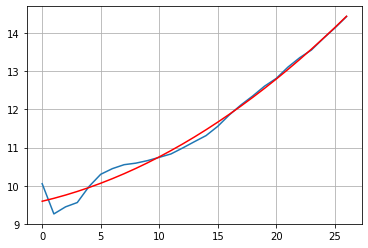

In [13]:
x=np.linspace(0,26,m)

plt.figure()
plt.plot(x,data)
plt.plot(x, 9.59128645+(0.072524127*x)+(0.004390247*(x**2)), "r")
plt.grid()

In [16]:
def funcion2(beta, X, y):
    
    beta=np.reshape(beta,[ 4 , -1 ])
    pred= X @ beta
    desv= (pred - y).T @ (pred - y)
    
    return desv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])
x2=np.reshape(x**2, [ m , -1 ])
x3=np.reshape(x**3, [ m , -1 ])

X=np.hstack((unos, x1, x2, x3))

beta_inicial=np.random.rand(4)
y=np.reshape(data, [ m , -1 ])

solucion=opt.minimize(funcion2, beta_inicial, args=(X,y))
solucion

      fun: 0.8404346758227135
 hess_inv: array([[ 2.27239836e-01, -6.41155369e-02,  4.83488763e-03,
        -1.06428232e-04],
       [-6.41155369e-02,  2.61881573e-02, -2.28211717e-03,
         5.43054418e-05],
       [ 4.83488763e-03, -2.28211717e-03,  2.13847628e-04,
        -5.32129922e-06],
       [-1.06428232e-04,  5.43054418e-05, -5.32129922e-06,
         1.36442005e-07]])
      jac: array([0.00000000e+00, 1.49011612e-08, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 10
     njev: 21
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495840e-02, 3.20207436e-03, 3.04659703e-05])

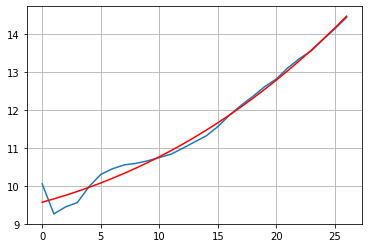

In [17]:
x=np.linspace(0,26,m)

plt.figure()
plt.plot(x,data)
plt.plot(x, 9.56752299+(0.0846495840*x)+(0.00320207436*(x**2)+(0.0000304659703*(x**3))), "r")
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---